# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
#uncomment and run if not installed
#pip install numpy
#pip install pandas

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here

#Get Rows and Columns and assign them to their own variables
row, col = df.shape
print('Rows: ' + str(row) + ', Columns: ' + str(col))


Rows: 1898, Columns: 9


#### Observations: There are 1898 rows and 9 columns are present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
#### order_id, customer_id, food_preparation_time, and delivery_time are int64 (integers) datatypes.
#### restaurant_name, cuisine_type, day_of_the_week and rating are object datatype.
#### cost_of_the_order is a float64 (decimal) datatype.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here

# Checking for missing values by checking if they are null and them summing them up
missing_values = df.isnull().sum()

print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: There are no missing values as none of the values are null.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here

# Using min, mean and max functions on the specifically selected column of food preparation time to get minimum, average, and maximum time. 
df['food_preparation_time'].min(), df['food_preparation_time'].mean(), df['food_preparation_time'].max()

#can also use the describe function to get these values
# df['food_preparation_time'].describe()

(20, 27.371970495258168, 35)

#### Observations:
#### The minimum time it takes for food to be prepared once an order is placed is 20 minutes.
#### The average time it takes for food to be prepared once an order is placed is 27.37 minutes.
#### The maximum time it takes for food to be prepared once an order is placed is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# filtering to get rows that have "Not given" as the rating
# then checking the shape to get total rows 
df[df['rating']=="Not given"].shape[0]

736

#### Observations: 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Number of unique order IDs: 1898
Number of unique customer IDs: 1200
Number of unique restaurant names: 178
Number of unique cuisine types: 14


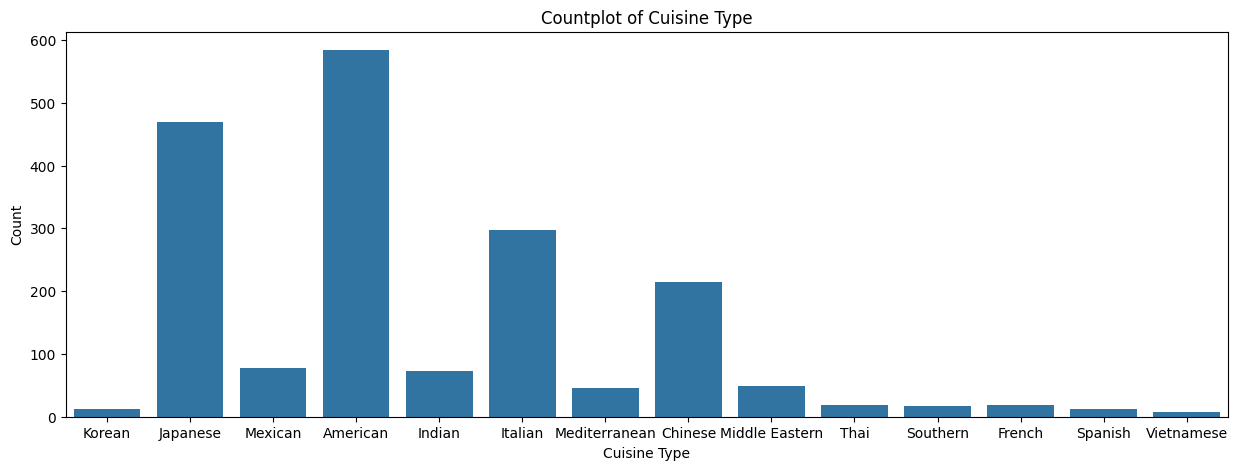

In [10]:
# Write the code here
#order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
#df.hist(figsize=(20,30))

# order_id
# Check if all order id's are unique in order_id column to make sure there are no duplicates
unique_order_id_count = df['order_id'].nunique() 
print(f"Number of unique order IDs: {unique_order_id_count}") # 1898 unique order id's so there are no duplicate orders

# customer_id
# Check if all customer id's are unique in customer_id column to check if any customers made multiple orders
unique_customer_id_count = df['customer_id'].nunique() 
print(f"Number of unique customer IDs: {unique_customer_id_count}") # 1200 unique customer id's so 698 customer id's are not unique meaning the multiple customers made multiple orders

# restaurant_name
# Check if all restaurant names are unique in the restaurant_name column to check if any restaurants have gotten multiple orders
unique_restaurant_name_count = df['restaurant_name'].nunique() 
print(f"Number of unique restaurant names: {unique_restaurant_name_count}") # 178 unique restaurant names

#cuisine_type
# Check all the unique types of food 
unique_cuisine_type_count = df['cuisine_type'].nunique() 
print(f"Number of unique cuisine types: {unique_cuisine_type_count}") # 14 unique cuisine types with Japenese, American, italian and chinese cuisines being ordered the most
# Create a countplot for cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') 
plt.title('Countplot of Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()


Histagram


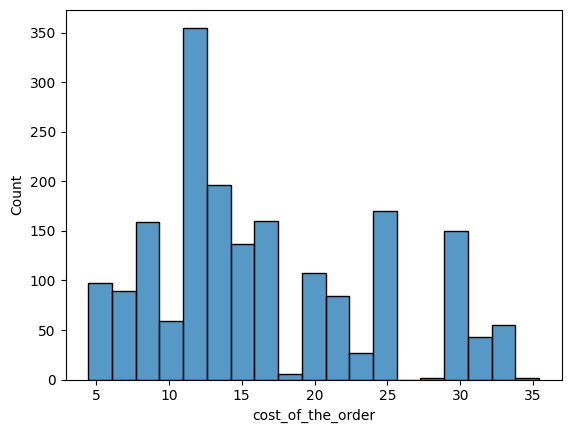

Box Plot


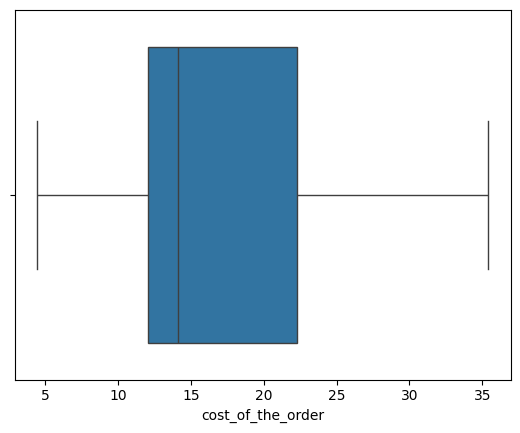

(4.47, 35.41)

In [11]:
#cost_of_the_order
print("Histagram")
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
print("Box Plot")
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 
df['cost_of_the_order'].min(), df['cost_of_the_order'].max() # order prices range between and including 4.47, 35.41 dollars
#right squed

2


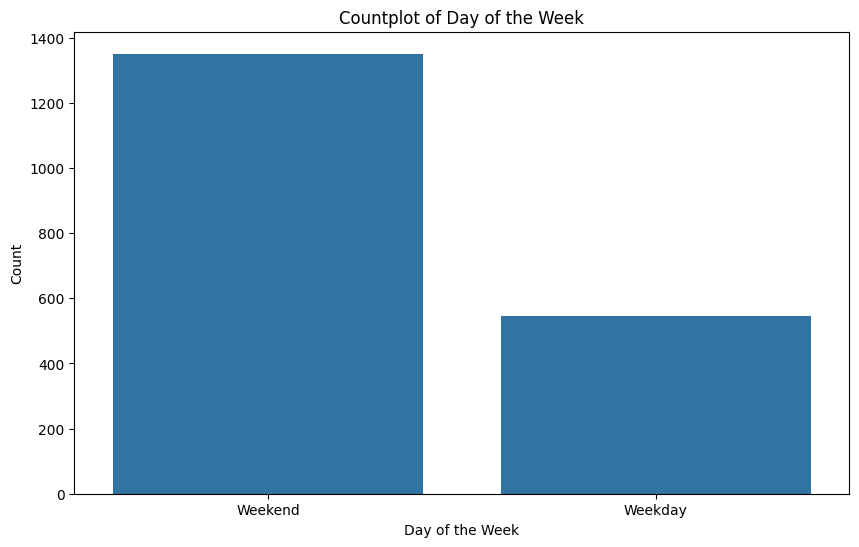

In [12]:
#day_of_the_week
print(df['day_of_the_week'].nunique())

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Countplot of Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()
# the count plot show a correlation that most orders occur on the weekend


Number of unique rating: 4


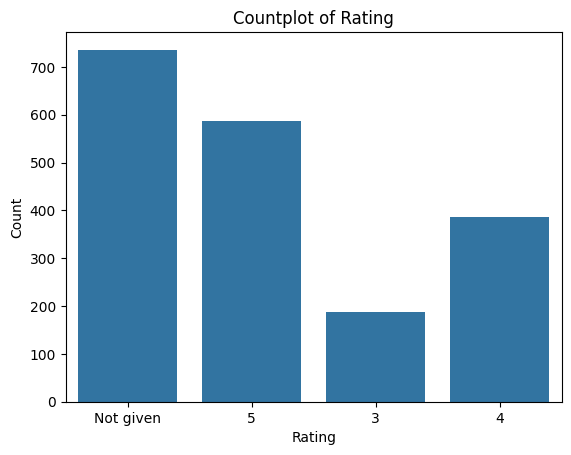

In [13]:
#rating
# Checking the unique ratings
unique_rating_count = df['rating'].nunique() 
print(f"Number of unique rating: {unique_rating_count}") # 4 
sns.countplot(data = df, x = 'rating')
plt.title('Countplot of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# A majority of orders are not given a rating or are 5 stars

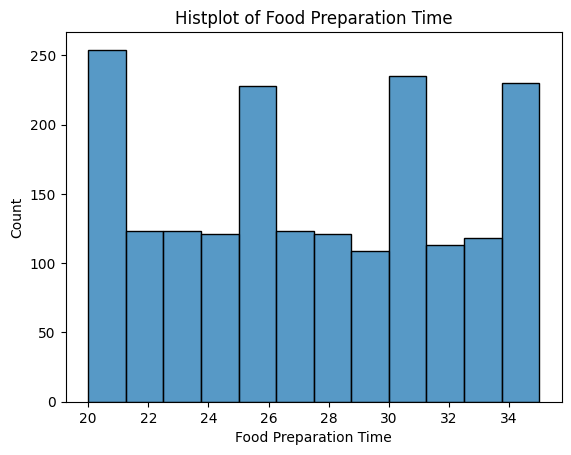

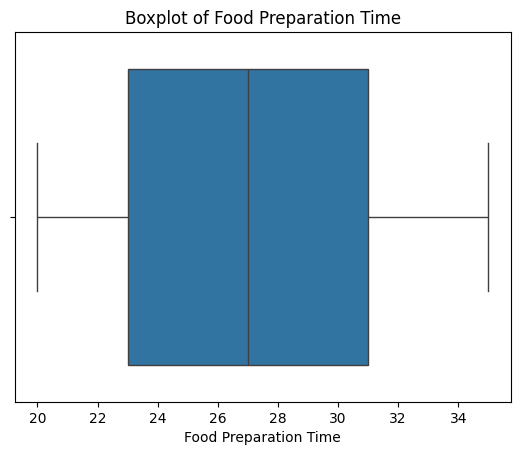

In [14]:
#food_preparation_time
sns.histplot(data=df,x='food_preparation_time') 
plt.title('Histplot of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Count')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')  
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.show()


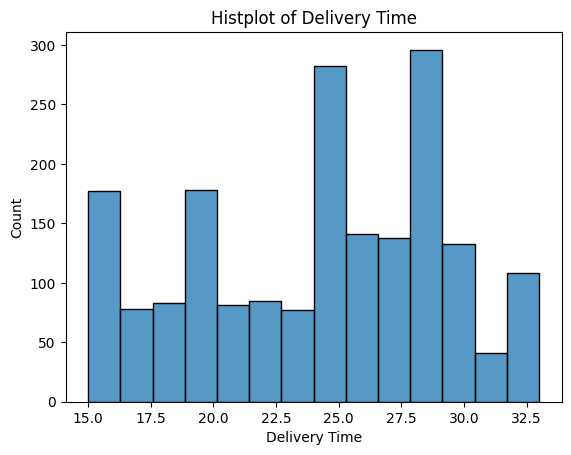

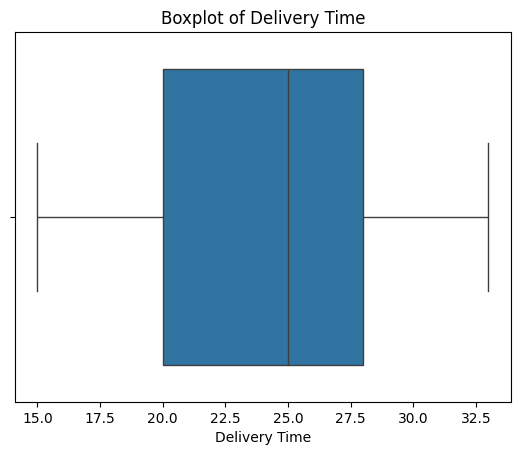

In [15]:
#delivery_time
sns.histplot(data=df,x='delivery_time') 
plt.title('Histplot of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.show()
sns.boxplot(data=df,x='delivery_time')  
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
# Write the code here
restaurants_With_Most_Orders_Received = df['restaurant_name'].value_counts().head(5)
print(restaurants_With_Most_Orders_Received)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: The top 5 restaurants in terms of the number of orders received from most to least are: 
#### Shake Shack (219 orders received), The Meatball Shop (132 orders received), Blue Ribbon Sushi (119 orders received), Blue Ribbon Fried Chicken (96 orders received), Parm (68 orders received)


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
# Write the code here
df_weekend_cuisines = df[df['day_of_the_week'] == 'Weekend']
most_popular_weekend_cuisines = df_weekend_cuisines['cuisine_type'].value_counts().idxmax()
print(f"The most popular cuisine on weekends is: {most_popular_weekend_cuisines}")

The most popular cuisine on weekends is: American


#### Observations: The most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Write the code here
df_cost_of_the_order_more_than_20 = df[df['cost_of_the_order']>20]
total_number_of_orders = df.shape[0]
number_of_orders_costing_more_than_20 = df_cost_of_the_order_more_than_20.shape[0]
print(f"The Total number of orders is: {total_number_of_orders}")
print(f"The Total number of orders that cost more than 20 dollars is: {number_of_orders_costing_more_than_20}")
print(f"Percentage = ({number_of_orders_costing_more_than_20} / {total_number_of_orders}) * 100")
print(f"The percentage of the orders that cost more than 20 dollars is: {((number_of_orders_costing_more_than_20/total_number_of_orders)*100):.2f}%")


The Total number of orders is: 1898
The Total number of orders that cost more than 20 dollars is: 555
Percentage = (555 / 1898) * 100
The percentage of the orders that cost more than 20 dollars is: 29.24%


#### Observations: The percentage of the orders that cost more than 20 dollars is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Write the code here
avg_delivery_time = df['delivery_time'].mean()
print(f"The mean delivery time is: {avg_delivery_time:.2f} mins.")

The mean delivery time is: 24.16 mins.


#### Observations: The mean delivery time is: 24.16 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# Write the code here 
most_frequent_customers = df['customer_id'].value_counts().head(3)
print(most_frequent_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 most frequent customers with customer IDs are 52832, 47440, 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [21]:
# order_id	customer_id	restaurant_name	cuisine_type 
# cost_of_the_order	day_of_the_week	rating	food_preparation_time
# delivery_time

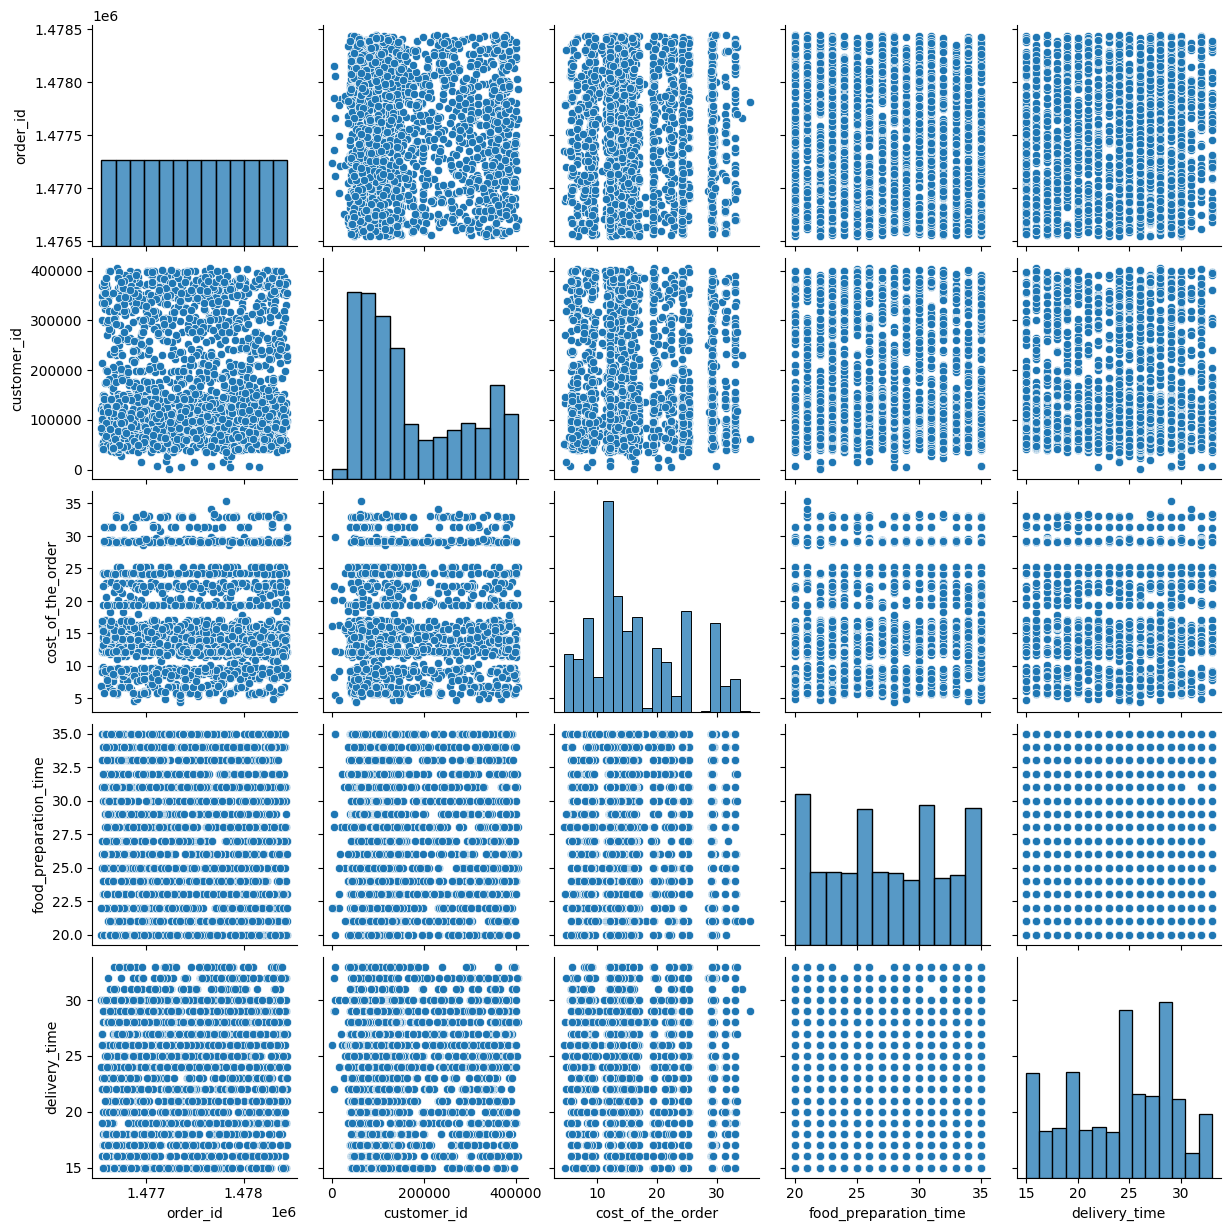

In [22]:
sns.pairplot(data=df)
plt.show()

<Axes: >

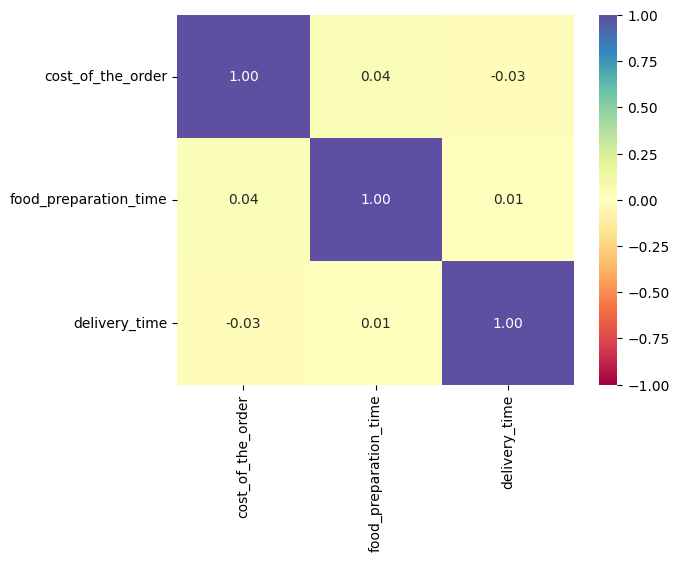

In [23]:
#correlation among numerical variables
num_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr_num_vars = df[num_vars].corr()

# Plot heatmap
sns.heatmap(corr_num_vars, annot = True, cmap="Spectral",            
        fmt = ".2f",            
        xticklabels = corr_num_vars.columns,            
        yticklabels = corr_num_vars.columns, vmin = -1, vmax = 1)

# There is not a significant correlation between the numerical variables

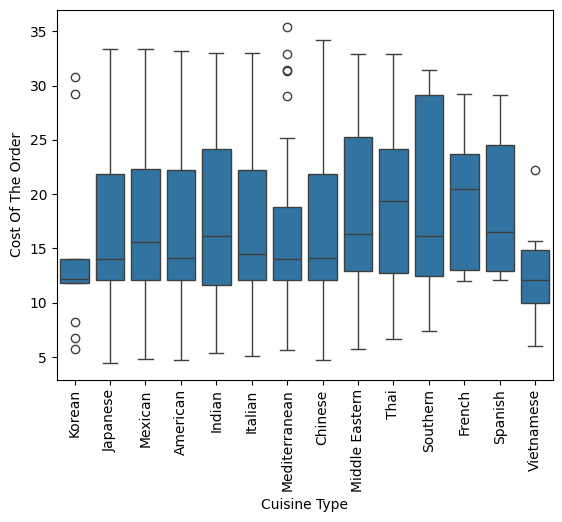

In [24]:
# cost_of_the_order vs cuisine_type
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost Of The Order')
plt.xticks(rotation = 90)
plt.show()

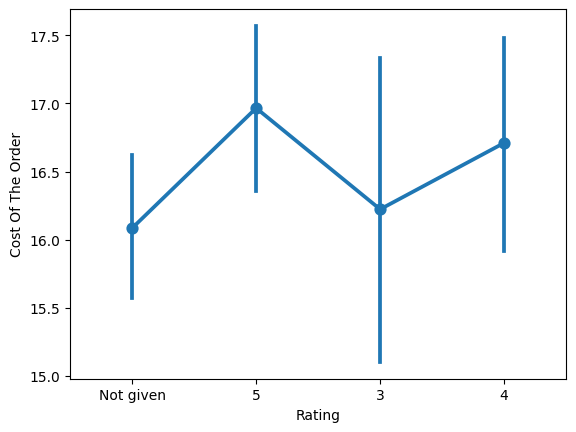

In [25]:
# cost_of_the_order vs rating
sns.pointplot(x = "rating", y = "cost_of_the_order", data = df)
plt.xlabel('Rating')
plt.ylabel('Cost Of The Order')
plt.show()

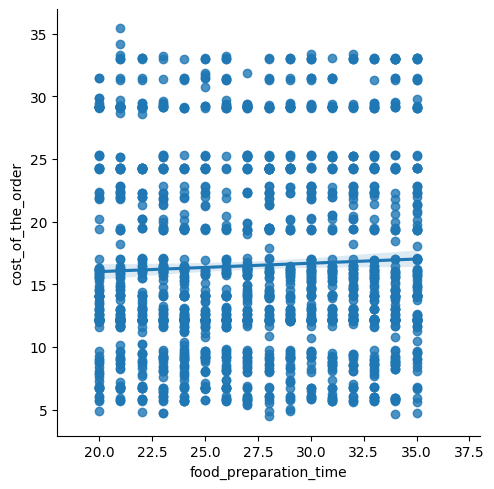

In [26]:
sns.lmplot(data=df, x="food_preparation_time", y="cost_of_the_order")
plt.xlim(18,38)
plt.show()

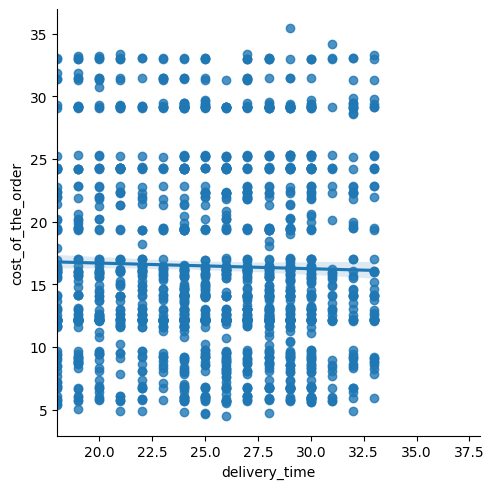

In [27]:
sns.lmplot(data=df, x="delivery_time", y="cost_of_the_order")
plt.xlim(18,38)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# # order_id	customer_id	restaurant_name	cuisine_type 
# cost_of_the_order	day_of_the_week	rating	food_preparation_time
# delivery_time

# Filter the rated restaurants to only keep integers and cast them as integers
df_filter_rated = df[df['rating'] != 'Not given'].copy()
df_filter_rated['rating'] = df_filter_rated['rating'].astype('int')  

# Filter restaurants based on a rating count of more than 50 and the average rating should be greater than 4
# Group data frame to get mean and count of ratings
df_restaurants = df_filter_rated.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
df_restaurants = df_restaurants[(df_restaurants['rating']['count'] > 50) & (df_restaurants['rating']['mean'] > 4)]

# Display the eligible restaurants
print("The restaurants fulfilling the criteria to get the promotional offer are:")
print(df_restaurants)

The restaurants fulfilling the criteria to get the promotional offer are:
                          rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations: The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
# Filter data frame for orders having cost greater than 20 dollars and then filter for just the costs 
# then get 25% of all costs and sum them
df_charges_greater_20 = ((df[df['cost_of_the_order']>20])['cost_of_the_order']*0.25).sum()
# Filter data frame for orders having cost between 2 and 20 dollars and then filter for just the costs 
# then get 15% of all costs and sum them
df_charges_greater_5 = ((df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20) ])['cost_of_the_order']*0.15).sum()
#add all charges to get net revenue
df_charges_applied = df_charges_greater_20 + df_charges_greater_5
print(f"The net revenue generated by the company across all orders is: {df_charges_applied:.2f} dollars.")


The net revenue generated by the company across all orders is: 6166.30 dollars.


#### Observations: The net revenue generated by the company across all orders is: 6166.30 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
# Creating a new column in the data frame which adds the cells from the food_preparation_time and delivery_time columns
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Filter data to get total times greater than 60 mins 
# count the number of filtered rows and divide by the total row to get decimal percentage
delivery_greater_60 = (((df[df['total_time']>60]).shape[0])/(df.shape[0]))*100

print(f"{delivery_greater_60:.2f}% of orders take more than 60 minutes to get delivered from the time the order is placed.")

10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations: 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [31]:
# 
avg_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
avg_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f"The mean delivery time during weekdays is {avg_weekday:.2f} minutes and on weekends {avg_weekend:.2f} minutes")

The mean delivery time during weekdays is 28.34 minutes and on weekends 22.47 minutes


#### Observations: The mean delivery time during weekdays is 28.34 minutes and on weekends 22.47 minutes
#### There is around about 6 minutes difference in delivery time during weekdays as compared to weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* It is weird that no rating of 1 or 2 stars is present and might signify incorrect data.
*  A third of all orders did not have a rating (736 not rated orders) (39% of all orders).
*  Although all rated orders were 3 stars or above signifying that customers who rated were mostly satisfied.
*  American, Japanese, Italien and Chinese cuisine types are most ordered

### Recommendations:

*  try incentivizing giving ratings to increase the total rating percentage
*  find out why the system is not getting 1 and 2-star ratings
*  increase prices on American, Japanese, Italien and Chinese cuisine to dive up revenue
*  Give incentives to Middle Eastern, Thai, French, and Indian cuisine types to drive up sales and drive up revenue as they have higher means

---